# MASK RECOGNITION

## Importing the libraries

In [1]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import keras
import shutil
import random
from keras.models import Sequential, Model
from keras import layers
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## Preprocessing the dataset

### Loading the dataset 

In [2]:
rootdir= 'dataset/'

classes = ['with_mask', 'without_mask']

for i in classes:
    
    os.makedirs(rootdir +'train/' + i)

    os.makedirs(rootdir +'test/' + i)

    source = rootdir + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.25

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, rootdir +'train/' + i)

    for name in test_FileNames:
      shutil.copy(name, rootdir +'test/' + i)

In [3]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (64,64),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [4]:
X_train, y_train = create_dataset(r'dataset/train')
print(len(X_train))
print(len(y_train))

5664
5664


In [5]:
X_test, y_test = create_dataset(r'dataset/test')
print(len(X_test))
print(len(y_test))

1889
1889


In [6]:
X_train[0].shape

(64, 64, 3)

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(y_train))}
target_dict

{'with_mask': 0, 'without_mask': 1}

#### Encoding the label

In [8]:
y_train =  [target_dict[y_train[i]] for i in range(len(y_train))]
print(len(y_train))

5664


In [9]:
y_test =  [target_dict[y_test[i]] for i in range(len(y_test))]
print(len(y_test))

1889


In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Building the CNN Model

In [11]:
cnn = tf.keras.Sequential()

### Building the model

In [12]:
cnn.add(tf.keras.layers.Conv2D(32, 3, strides = (1, 1), padding = "valid", activation = "relu", input_shape = (64,64,3)))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 1, padding = "valid"))
cnn.add(tf.keras.layers.Conv2D(32, 3, strides = (1, 1), padding = "valid", activation = "relu"))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 1, padding = "valid"))
cnn.add(tf.keras.layers.Conv2D(32, 3, strides = (1, 1), padding = "valid", activation = "relu"))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 1, padding = "valid"))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation = "relu"))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(128, activation = "relu"))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 32)       0

In [14]:
cnn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

### Training the model 

In [16]:
model_saved = cnn.fit(X_train, y_train, epochs = 25, validation_data = (X_test, y_test))

Epoch 1/25
177/177 [==============================] - 118s 667ms/step - loss: 0.3099 - accuracy: 0.8711 - val_loss: 0.3519 - val_accuracy: 0.8544
Epoch 2/25
177/177 [==============================] - 101s 573ms/step - loss: 0.2241 - accuracy: 0.9124 - val_loss: 0.2048 - val_accuracy: 0.9259
Epoch 3/25
177/177 [==============================] - 99s 561ms/step - loss: 0.1674 - accuracy: 0.9364 - val_loss: 0.1842 - val_accuracy: 0.9285
Epoch 4/25
177/177 [==============================] - 100s 566ms/step - loss: 0.1334 - accuracy: 0.9481 - val_loss: 0.1711 - val_accuracy: 0.9428
Epoch 5/25
177/177 [==============================] - 102s 575ms/step - loss: 0.1162 - accuracy: 0.9550 - val_loss: 0.1906 - val_accuracy: 0.9238
Epoch 6/25
177/177 [==============================] - 102s 575ms/step - loss: 0.0813 - accuracy: 0.9726 - val_loss: 0.2143 - val_accuracy: 0.9359
Epoch 7/25
177/177 [==============================] - 102s 575ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 0.2265 - 

In [17]:
np.mean(model_saved.history['accuracy'])

0.9759675192832947

In [18]:
np.mean(model_saved.history['val_accuracy'])

0.9328321886062622

### Save the Model

In [19]:
cnn.save('mymodel',model_saved)

2022-02-14 22:34:58.973518: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mymodel/assets


In [20]:
cnn.save_weights('mymodel_weights',model_saved)

## Plotting the graph

### Accuracy

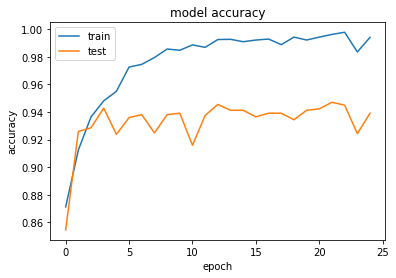

In [21]:
plt.plot(model_saved.history['accuracy'])
plt.plot(model_saved.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Loss

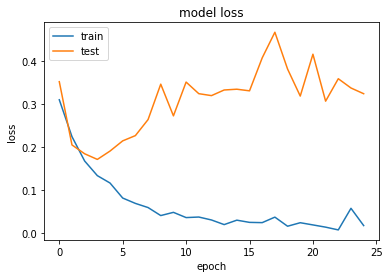

In [22]:
plt.plot(model_saved.history['loss'])
plt.plot(model_saved.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Load the model and test accuracy

In [24]:
new_model = tf.keras.models.load_model('mymodel')

In [25]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

60/60 - 8s - loss: 0.3240 - accuracy: 0.9391 - 8s/epoch - 131ms/step
Restored model, accuracy: 93.91%


## Predict a sample image

In [27]:
sample_image = image.load_img('dataset/test/with_mask/with_mask_1011.jpg', target_size = (64, 64, 3))

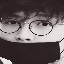

In [28]:
sample_image

In [29]:
sample_image = image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image,axis=0)

In [30]:
pred = cnn.predict(sample_image)

In [31]:
pred[0][0]

0.0

In [32]:
if pred[0][0] == 1:
  prediction = 'without_mask'
else:
  prediction = 'with_mask'

In [33]:
prediction

'with_mask'